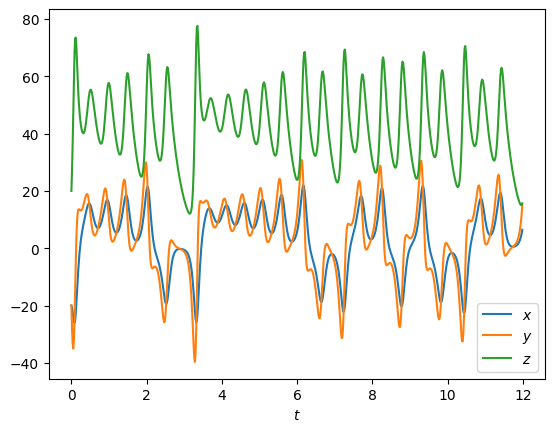

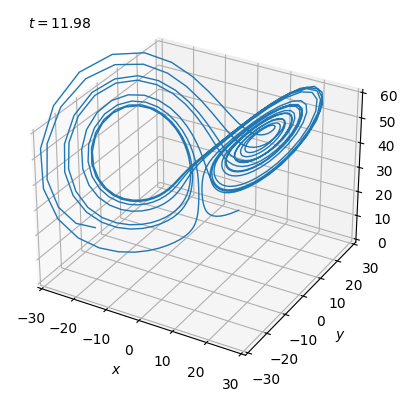

In [1]:
#!/usr/bin/env python

from numpy import arange
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
from scipy.integrate import solve_ivp

# b
def lorenz(t, state, sigma, rho, beta):
	x, y, z = state
	return [sigma*(y-x), x*(rho-z)-y, x*y-beta*z]

t = arange(12, step=1/60)
x, y, z = solve_ivp(lorenz, (t[0], t[-1]), [-20, -20, 20], args=(10, 48, 3), t_eval=t).y

plt.plot(t, x, label='$x$')
plt.plot(t, y, label='$y$')
plt.plot(t, z, label='$z$')
plt.xlabel('$t$')
plt.legend()
plt.show()

# c
fig, ax = plt.subplots(1, 1, subplot_kw={'projection': '3d'})
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')
ax.set_xlim(-30, 30)
ax.set_ylim(-30, 30)
ax.set_zlim(0, 60)
line, = ax.plot([], [], [], lw=1)
time_text = ax.text2D(0.05, 0.95, '', transform=ax.transAxes)
def update(i):
	line.set_data(x[:i], y[:i])
	line.set_3d_properties(z[:i])
	time_text.set_text(f'$t={t[i]:.2f}$')
	return line, time_text
ani = FuncAnimation(fig, update, frames=len(t), blit=True)
ani.save('lorenz.mkv', writer='ffmpeg', fps=60)